# Task 4: Sentiment Analysis using NLP
CODTECH Data Analysis Internship

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns
from google.colab import files

In [6]:
# Load the dataset
uploaded = files.upload()
df = pd.read_csv("organizations-100.csv")
df.head()

Saving organizations-100.csv to organizations-100.csv


,Index,Organization Id,Name,Website,Country,Description,Founded,Industry,Number of employees
0,1,FAB0d41d5b5d22c,Ferrell LLC,https://price.net/,Papua New Guinea,Horizontal empowering knowledgebase,1990,Plastics,3498
1,2,6A7EdDEA9FaDC52,"Mckinney, Riley and Day",http://www.hall-buchanan.info/,Finland,User-centric system-worthy leverage,2015,Glass / Ceramics / Concrete,4952
2,3,0bFED1ADAE4bcC1,Hester Ltd,http://sullivan-reed.com/,China,Switchable scalable moratorium,1971,Public Safety,5287
3,4,2bFC1Be8a4ce42f,Holder-Sellers,https://becker.com/,Turkmenistan,De-engineered systemic artificial intelligence,2004,Automotive,921
4,5,9eE8A6a4Eb96C24,Mayer Group,http://www.brewer.com/,Mauritius,Synchronized needs-based challenge,1991,Transportation,7870


In [7]:
# Select the Description column for analysis
df['Description'] = df['Description'].astype(str)

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df['Polarity'] = df['Description'].apply(get_sentiment)

# Label based on polarity
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

df[['Description', 'Polarity', 'Sentiment']].head()

,Description,Polarity,Sentiment
0,Horizontal empowering knowledgebase,0.0,Neutral
1,User-centric system-worthy leverage,0.0,Neutral
2,Switchable scalable moratorium,0.0,Neutral
3,De-engineered systemic artificial intelligence,-0.6,Negative
4,Synchronized needs-based challenge,0.0,Neutral


/tmp/ipython-input-8-1869893858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='pastel')


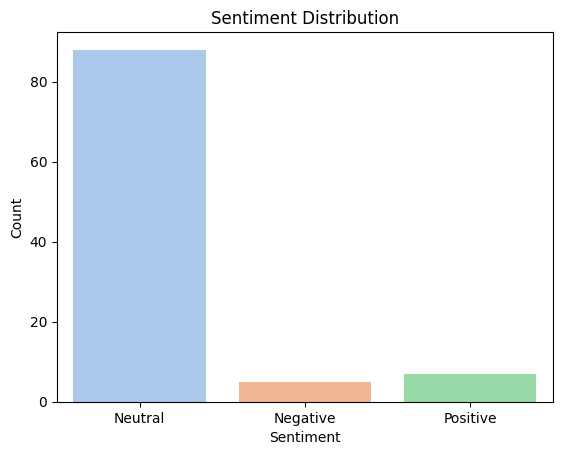

In [8]:
# Visualize sentiment distribution
sns.countplot(x='Sentiment', data=df, palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

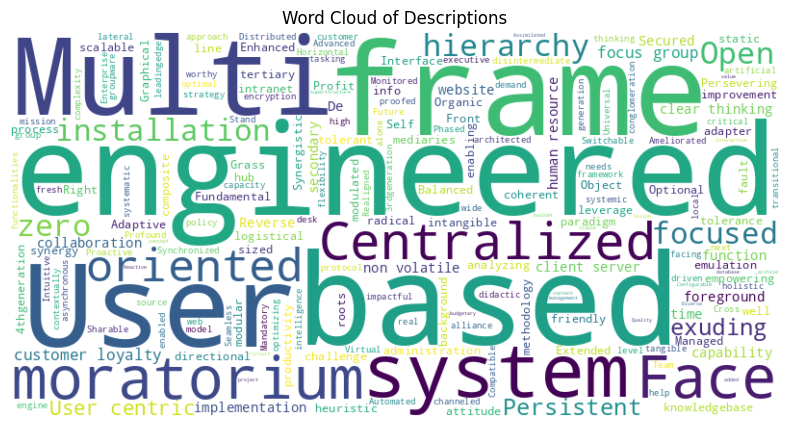

In [9]:
# Generate WordCloud for all descriptions
text = " ".join(desc for desc in df['Description'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()